# Treasury Yield Curve

In [1]:
import yfinance as yf
import requests
import os
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from dotenv import load_dotenv
load_dotenv()

%matplotlib inline

In [42]:
# Read in Treasury yields 1990-2021 from US Department of Treasury website
yield_data_1990_2021 = pd.read_csv('resources/yield-curve-rates-1990-2021.csv')
yield_data_1990_2021['Date'] = pd.to_datetime(yield_data_1990_2021["Date"])
yield_data_1990_2021 = yield_data_1990_2021.set_index('Date').sort_index()
yield_data_1990_2021

,1 Mo,2 Mo,3 Mo,6 Mo,1 Yr,2 Yr,3 Yr,5 Yr,7 Yr,10 Yr,20 Yr,30 Yr
Date,,,,,,,,,,,,
1990-01-02,NaN,NaN,7.83,7.89,7.81,7.87,7.90,7.87,7.98,7.94,NaN,8.00
1990-01-03,NaN,NaN,7.89,7.94,7.85,7.94,7.96,7.92,8.04,7.99,NaN,8.04
1990-01-04,NaN,NaN,7.84,7.90,7.82,7.92,7.93,7.91,8.02,7.98,NaN,8.04
1990-01-05,NaN,NaN,7.79,7.85,7.79,7.90,7.94,7.92,8.03,7.99,NaN,8.06
1990-01-08,NaN,NaN,7.79,7.88,7.81,7.90,7.95,7.92,8.05,8.02,NaN,8.09
...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-27,0.04,0.05,0.06,0.21,0.33,0.76,0.98,1.26,1.41,1.48,1.92,1.88
2021-12-28,0.03,0.04,0.06,0.20,0.39,0.74,0.99,1.27,1.41,1.49,1.94,1.90
2021-12-29,0.01,0.02,0.05,0.19,0.38,0.75,0.99,1.29,1.47,1.55,2.00,1.96


In [44]:
# Read in Treasury yields for 2021 from US Department of Treasury website (updated daily)
yield_data_2022 = pd.read_csv('resources/daily-treasury-rates.csv')
yield_data_2022['Date'] = pd.to_datetime(yield_data_2022["Date"])
yield_data_2022 = yield_data_2022.set_index('Date').sort_index()
yield_data_2022.tail()


,1 Mo,2 Mo,3 Mo,6 Mo,1 Yr,2 Yr,3 Yr,5 Yr,7 Yr,10 Yr,20 Yr,30 Yr
Date,,,,,,,,,,,,
2022-08-08,2.23,2.43,2.65,3.15,3.30,3.21,3.14,2.91,2.85,2.77,3.22,3.00
2022-08-09,2.23,2.43,2.67,3.16,3.33,3.28,3.20,2.97,2.89,2.80,3.24,3.01
2022-08-10,2.24,2.43,2.65,3.13,3.26,3.23,3.13,2.93,2.86,2.78,3.27,3.04
2022-08-11,2.24,2.51,2.62,3.08,3.25,3.23,3.16,2.98,2.94,2.87,3.38,3.15
2022-08-12,2.23,2.50,2.63,3.13,3.26,3.25,3.18,2.97,2.92,2.84,3.34,3.12


In [60]:
yield_data = pd.concat([yield_data_1990_2021, yield_data_2022],axis=0)
yield_data.tail()

,1 Mo,2 Mo,3 Mo,6 Mo,1 Yr,2 Yr,3 Yr,5 Yr,7 Yr,10 Yr,20 Yr,30 Yr
Date,,,,,,,,,,,,
2022-08-08,2.23,2.43,2.65,3.15,3.30,3.21,3.14,2.91,2.85,2.77,3.22,3.00
2022-08-09,2.23,2.43,2.67,3.16,3.33,3.28,3.20,2.97,2.89,2.80,3.24,3.01
2022-08-10,2.24,2.43,2.65,3.13,3.26,3.23,3.13,2.93,2.86,2.78,3.27,3.04
2022-08-11,2.24,2.51,2.62,3.08,3.25,3.23,3.16,2.98,2.94,2.87,3.38,3.15
2022-08-12,2.23,2.50,2.63,3.13,3.26,3.25,3.18,2.97,2.92,2.84,3.34,3.12


In [47]:
# Select yields to analyze
yield_curve = yield_data[['3 Mo','2 Yr','10 Yr','20 Yr']]
yield_curve.tail()

,3 Mo,2 Yr,10 Yr,20 Yr
Date,,,,
2022-08-08,2.65,3.21,2.77,3.22
2022-08-09,2.67,3.28,2.80,3.24
2022-08-10,2.65,3.23,2.78,3.27
2022-08-11,2.62,3.23,2.87,3.38
2022-08-12,2.63,3.25,2.84,3.34


In [48]:
# Set yield frequency as monthly
yield_curve = yield_curve.asfreq(freq='M').ffill()
yield_curve = yield_curve.loc['1990':]
yield_curve.tail()

,3 Mo,2 Yr,10 Yr,20 Yr
Date,,,,
2022-03-31,0.52,2.28,2.32,2.59
2022-04-30,0.52,2.28,2.32,2.59
2022-05-31,1.16,2.53,2.85,3.28
2022-06-30,1.72,2.92,2.98,3.38
2022-07-31,1.72,2.92,2.98,3.38


<AxesSubplot:title={'center':'US Treasury Yield'}, xlabel='Date', ylabel='%'>

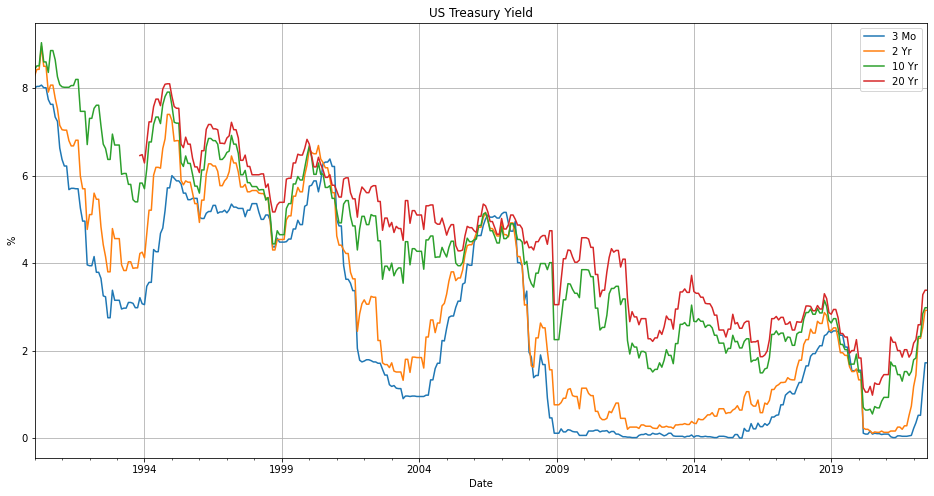

In [49]:
# Plot US Tresury yield curves
yield_curve.plot(figsize = (16,8), title = 'US Treasury Yield', ylabel = '%', grid=True)

In [50]:
# Create the difference between the long and short yield curve; You may select different long term yields (10YR, 20YR etc.)
long_short_diff = yield_curve['10 Yr'] - yield_curve['3 Mo']
long_short_diff.tail()

Date
2022-03-31    1.80
2022-04-30    1.80
2022-05-31    1.69
2022-06-30    1.26
2022-07-31    1.26
Freq: M, dtype: float64

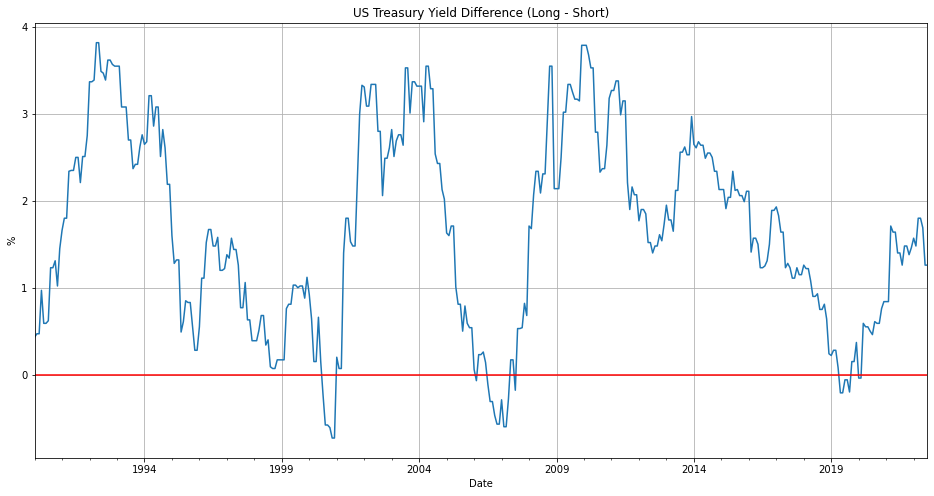

In [51]:
# Plot the difference between the long and short yield curve to identify inverted curve (y value below 0)
long_short_plot = long_short_diff.plot(figsize = (16,8), title = 'US Treasury Yield Difference (Long - Short)', ylabel = '%', grid=True)
plt.axhline(0, c='r')

In [52]:
# Pull S&P Index historical values from yfinance API
ticker = "^GSPC" 
start= "1990-01-01" 
end= "2022-07-31"

sp_history = yf.download(ticker, start=start, end=end, progress=False)

In [53]:
# Set frequency to Monthly; Forward fill missing values
sp_history = sp_history['Adj Close'].asfreq(freq='M').ffill()
sp_history.tail()

Date
2022-02-28    4373.939941
2022-03-31    4530.410156
2022-04-30    4530.410156
2022-05-31    4132.149902
2022-06-30    3785.379883
Freq: M, Name: Adj Close, dtype: float64

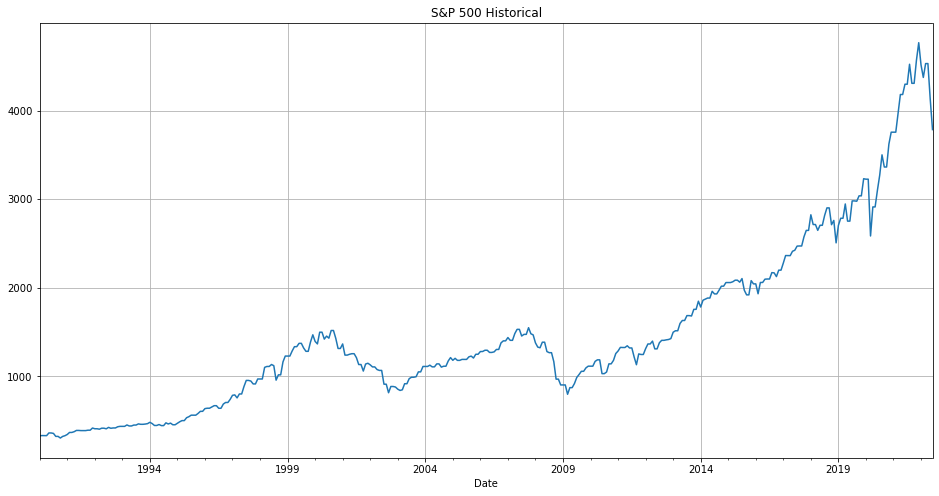

In [54]:
# Plot S&P Index historical data
sp_plot = sp_history.plot(figsize=(16,8), title='S&P 500 Historical', grid=True)

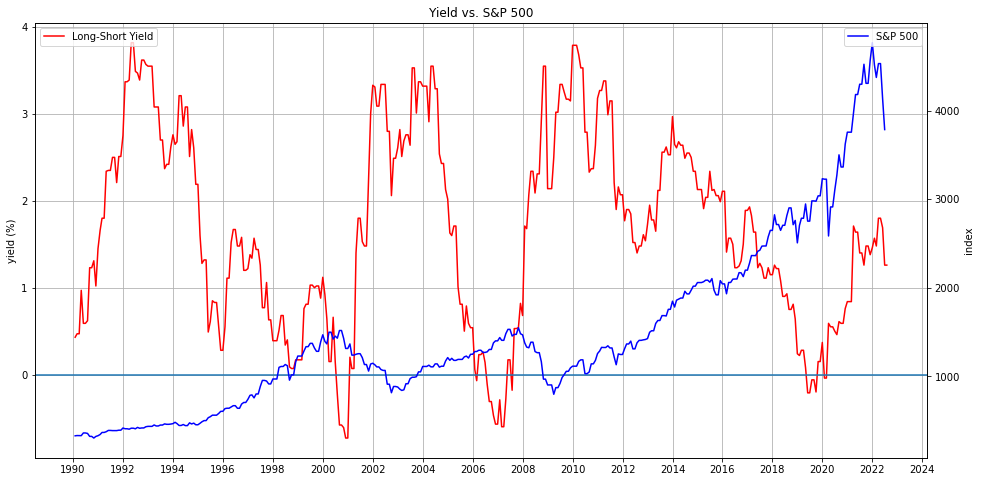

In [55]:
# Long-Short Yield Curve below 0 shows inverted curve.
fig, ax = plt.subplots(figsize=(16,8))
plt.plot(long_short_diff, label ='Long-Short Yield', color='r')
ax.set_ylabel('yield (%)')
plt.grid()
ax.axhline(y=0)
ax.legend(loc='upper left')
ax.xaxis.set_major_locator(mdates.YearLocator(2))

ax2 = ax.twinx()
plt.plot(sp_history, label='S&P 500', color='b')
ax.set_title('Yield vs. S&P 500')
ax2.set_ylabel('index')
ax2.legend(loc='upper right')

# 10-Year TIPS vs Treasury Bond Yield
### The yield spread between the 10-year Treasury and the TIPS bond can be viewed as the bond market's expectation for inflation as measured by the Consumer Price Index.

In [56]:
# Read in Real Constant Maturity Treasury yields 2003-2021 from US Department of Treasury website 
yield_real_data_2003_2021 = pd.read_csv('resources/par-real-yield-curve-rates-2003-2021.csv').drop(columns=['5 YR','7 YR', '20 YR', '30 YR']).rename(columns={'10 YR':'10 Yr Real'})
yield_real_data_2003_2021['Date'] = pd.to_datetime(yield_real_data_2003_2021["Date"])
yield_real_data_2003_2021 = yield_real_data_2003_2021.set_index('Date').sort_index()
yield_real_data_2003_2021.tail()

,10 Yr Real
Date,
2021-12-27,-1.02
2021-12-28,-1.01
2021-12-29,-0.98
2021-12-30,-1.06
2021-12-31,-1.04


In [57]:
# Read in Real Constant Maturity Treasury yields for year 2022 from US Department of Treasury website (updated daily)
yield_real_data_2022 = pd.read_csv('resources/par-real-yield-curve-rates-2022.csv').drop(columns=['5 YR','7 YR', '20 YR', '30 YR']).rename(columns={'10 YR':'10 Yr Real'})
yield_real_data_2022['Date'] = pd.to_datetime(yield_real_data_2022["Date"])
yield_real_data_2022 = yield_real_data_2022.set_index('Date').sort_index()
yield_real_data_2022.head()

,10 Yr Real
Date,
2022-01-03,-0.97
2022-01-04,-0.91
2022-01-05,-0.82
2022-01-06,-0.73
2022-01-07,-0.72


In [66]:
yield_real_data = pd.concat([yield_real_data_2003_2021, yield_real_data_2022],axis=0)
yield_real_data.tail()

,10 Yr Real
Date,
2022-08-08,0.29
2022-08-09,0.33
2022-08-10,0.35
2022-08-11,0.40
2022-08-12,0.37


In [67]:

yield_data['10 YR Real'] = yield_real_data['10 Yr Real']
yield_data['10_Yr_diff'] = yield_data['10 Yr'] - yield_data['10 YR Real']
yield_data.tail()

,1 Mo,2 Mo,3 Mo,6 Mo,1 Yr,2 Yr,3 Yr,5 Yr,7 Yr,10 Yr,20 Yr,30 Yr,10 YR Real,10_Yr_diff
Date,,,,,,,,,,,,,,
2022-08-08,2.23,2.43,2.65,3.15,3.30,3.21,3.14,2.91,2.85,2.77,3.22,3.00,0.29,2.48
2022-08-09,2.23,2.43,2.67,3.16,3.33,3.28,3.20,2.97,2.89,2.80,3.24,3.01,0.33,2.47
2022-08-10,2.24,2.43,2.65,3.13,3.26,3.23,3.13,2.93,2.86,2.78,3.27,3.04,0.35,2.43
2022-08-11,2.24,2.51,2.62,3.08,3.25,3.23,3.16,2.98,2.94,2.87,3.38,3.15,0.40,2.47
2022-08-12,2.23,2.50,2.63,3.13,3.26,3.25,3.18,2.97,2.92,2.84,3.34,3.12,0.37,2.47


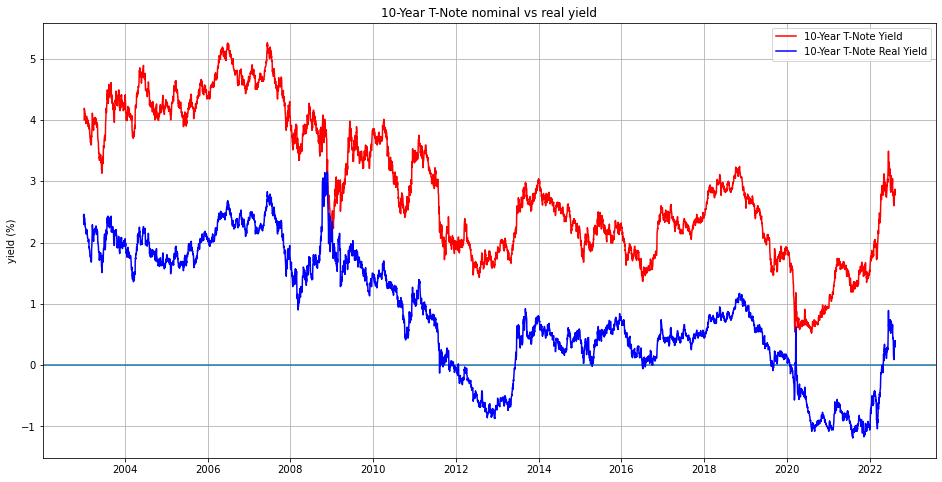

In [68]:
# Plot 10-year Treasury yield vs real yield
fig, ax = plt.subplots(figsize=(16,8))
plt.plot(yield_data['10 Yr'].loc['2003-01-08':], label ='10-Year T-Note Yield', color='r')
ax.set_ylabel('yield (%)')
plt.grid()
ax.axhline(y=0)
ax.legend(loc='upper left')

plt.plot(yield_data['10 YR Real'], label ='10-Year T-Note Real Yield', color='b')
ax.set_ylabel('yield (%)')
ax.legend(loc='upper right')

plt.title('10-Year T-Note nominal vs real yield')
ax.xaxis.set_major_locator(mdates.YearLocator(2))

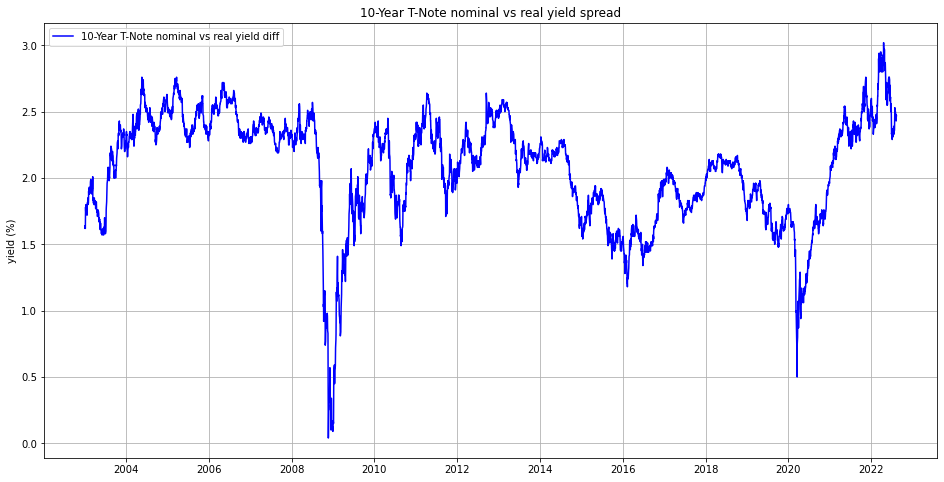

In [69]:
# Plot the difference between nominal and real 10-Year Tresury Yield
fig, ax = plt.subplots(figsize=(16,8))
plt.plot(yield_data['10_Yr_diff'], label ='10-Year T-Note nominal vs real yield diff', color='b')
ax.set_ylabel('yield (%)')
plt.grid()
ax.legend(loc='upper left')
plt.title('10-Year T-Note nominal vs real yield spread')
ax.xaxis.set_major_locator(mdates.YearLocator(2))